##### Loading the Data

In [1]:
# Importting the libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Importing the torch libraries
import torch
from torch.utils.data import DataLoader
from torch import nn, optim
import torch.nn.functional as F

import torchvision
from torchvision.datasets import FashionMNIST
from torchvision import transforms

In [3]:
# Defining a data transform
transform = transforms.ToTensor()

In [24]:
# Batch size
batch_size = 20

# Loading the training set
train_data = FashionMNIST(root = './data/', train = True, transform = transform, download = True)
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
print("Number of training images: ", len(train_data))

# Loading the test set
test_data = FashionMNIST(root = './data/', train = False, transform = transform, download = False)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)
print("Number of test images: ", len(test_data))

Number of training images:  60000
Number of test images:  10000


In [25]:
# Specifying the classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##### Visualizing the Dataset

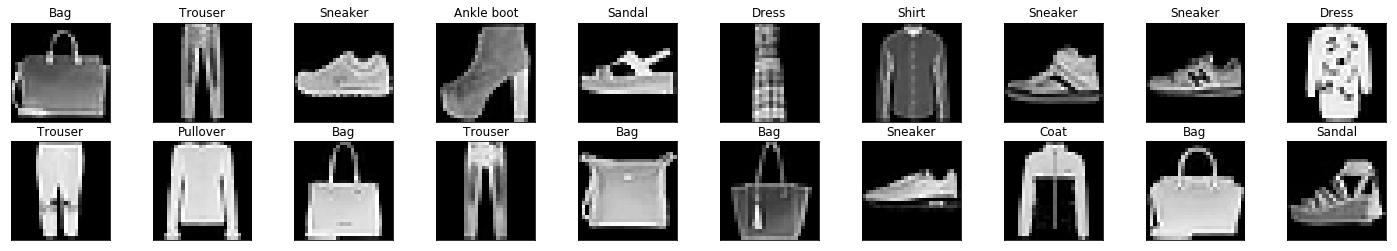

In [27]:
# Obtaining one batch
one_batch = next(iter(train_loader))
images, labels = one_batch
images = images.numpy()

# Visualizing the images
fig = plt.figure(figsize = (25, 4))
for index in range(batch_size):
    ax = fig.add_subplot(2, batch_size/2, index+1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(images[index]), cmap = 'gray')
    ax.set_title(classes[labels[index]])

##### The Netwerk

In [48]:
class Net(nn.Module):
    
    def __init__(self):
        
        super(Net, self).__init__()
        
        # First Convolutional Layer
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 10, kernel_size = 3)
        
        # Maxpooling Layer
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        # Second Convolutional Layer
        self.conv2 = nn.Conv2d(in_channels = 10, out_channels = 20, kernel_size = 3)
        
        # First Fully Connected Layer
        self.fc1 = nn.Linear(in_features = 5*5*20, out_features = 50)
        
        # Adding Dropout
        self.fc1_drop = nn.Dropout(p = 0.4)
        
        # Second Fully Connected Layer
        self.fc2 = nn.Linear(in_features = 50, out_features = 10)
        

    def forward(self, x):
        
        # First Convolution + relu + Pooling layer
        x = self.pool(F.relu(self.conv1(x)))
        
        # Second Convolution + relu + Pooling layer
        x = self.pool(F.relu(self.conv2(x)))
        
        # Flattening the image
        x = x.view(x.size(0), -1)
        
        # First fully connected layer + relu
        x = F.relu(self.fc1(x))
        x = self.fc1_drop(x)
        
        # Second fully connected layer
        x = self.fc2(x)
        
        return x

In [49]:
# Instantiate the model
net = Net()

# Loading the parameters
net.load_state_dict(torch.load('./saved_models/fashion_net_ex.pt'))

print(net)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=500, out_features=50, bias=True)
  (fc1_drop): Dropout(p=0.4)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


##### Feature Visualization

In [60]:
# Getting the weights in first convolutional layer
weights = net.conv1.weight.data
w = weights.numpy()

First Convolutional Layer


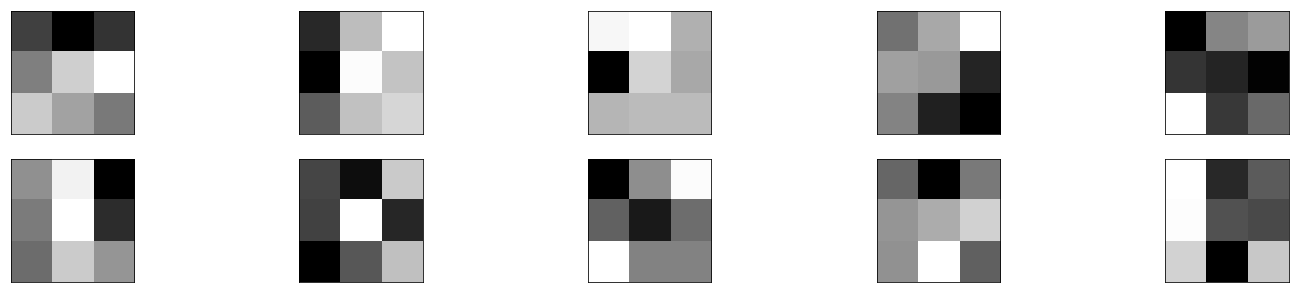

In [71]:
fig = plt.figure(figsize = (25, 5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks = [], yticks = [])
    ax.imshow(w[i][0], cmap = 'gray')
    
print("First Convolutional Layer")
plt.show()

In [72]:
weights = net.conv2.weight.data
w = weights.numpy()

Second Convolutional Layer


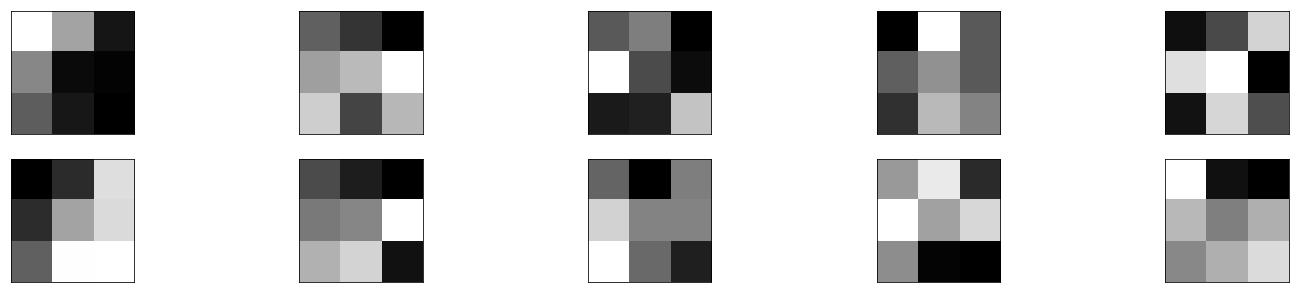

In [73]:
fig = plt.figure(figsize = (25, 5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks = [], yticks = [])
    ax.imshow(w[i][0], cmap = 'gray')
    
print("Second Convolutional Layer")
plt.show()

##### Visualizing Activation Maps

In [79]:
# Obtaining one batch of images
one_batch = next(iter(train_loader))
images, labels = one_batch
images = images.numpy()

# Selecting an image
index = 10
image = np.squeeze(images[index])

In [80]:
# Weights of the first convolutional layer
weights_conv1 = net.conv1.weight.data
weights_conv1 = weights.numpy()

# Weights of the second convolutional layer
weights_conv2 = net.conv2.weight.data
weights_conv2 = weights_conv2.numpy()

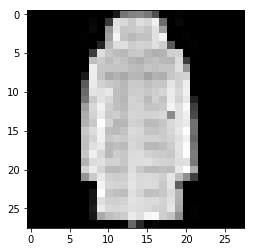

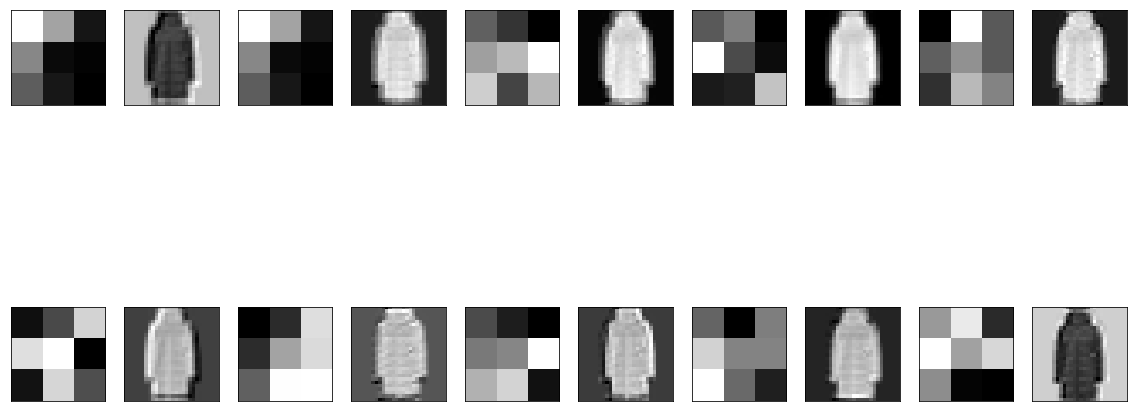

In [95]:
# Visualizing filters of first CNN layer
plt.imshow(image, cmap = 'gray')

fig = plt.figure(figsize = (20, 10))
for i in range(20):
    ax = fig.add_subplot(2, 10, i+1, xticks = [], yticks = [])
    if i % 2 == 0:
        ax.imshow(weights_conv1[int((i-1)/2)][0], cmap = 'gray')
    else:
        ax.imshow(cv2.filter2D(image, -1, weights_conv1[int((i-1)/2)][0]), cmap = 'gray')

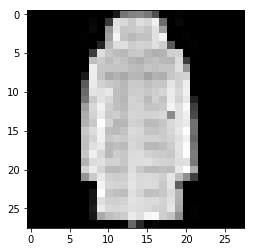

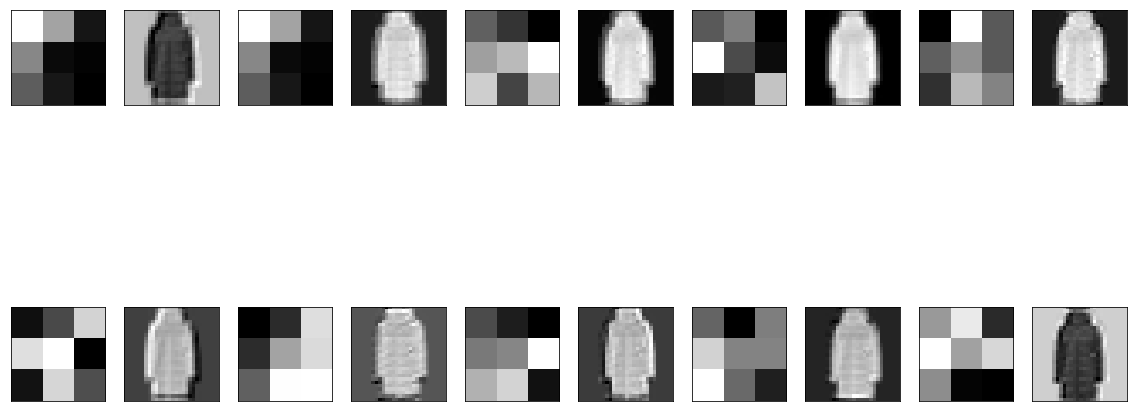

In [96]:
# Visualizing filters for second CNN layer
plt.imshow(image, cmap = 'gray')

fig = plt.figure(figsize = (20, 10))
for i in range(20):
    ax = fig.add_subplot(2, 10, i+1, xticks = [], yticks = [])
    if i % 2 == 0:
        ax.imshow(weights_conv2[int((i-1)/2)][0], cmap = 'gray')
    else:
        ax.imshow(cv2.filter2D(image, -1, weights_conv2[int((i-1)/2)][0]), cmap = 'gray')